In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt -P ./data/
!wget -nc https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt -P ./data/

File ‘./data/ratings_train.txt’ already there; not retrieving.

File ‘./data/ratings_test.txt’ already there; not retrieving.



In [ ]:
from datasets import load_dataset

dataset = load_dataset("nsmc")

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
import numpy as np

train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

In [ ]:
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  object
 1   document  150000 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


## 1. 간단한 EDA 작업

In [ ]:
# character count 계산
train_df['char_cnt'] = train_df['document'].astype(str).apply(len)
test_df['char_cnt'] = test_df['document'].astype(str).apply(len)

# word count 계산
train_df['word_cnt'] = train_df['document'].astype(str).apply(lambda x: len(x.split(' ')))
test_df['word_cnt'] = train_df['document'].astype(str).apply(lambda x: len(x.split(' ')))

In [ ]:
train_df.head()

,id,document,label,char_cnt,word_cnt
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19,5
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33,4
2,10265843,너무재밓었다그래서보는것을추천한다,0,17,1
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29,6
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61,11


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# 일단 import 
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고
fm._rebuild()

NanumGothic Eco


In [ ]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts

Text(0.5, 0, 'Character Count')

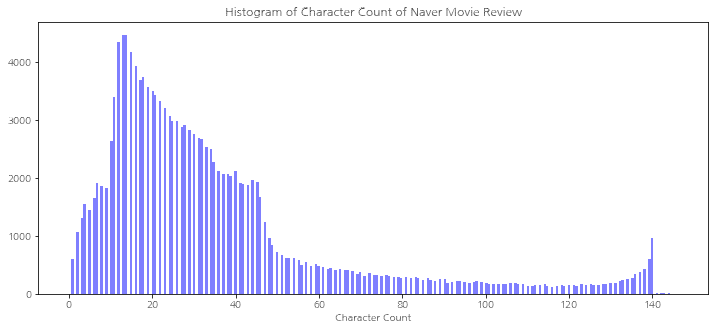

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(train_df['char_cnt'], bins=250, alpha=0.5, color='b', label='word')
plt.title('Histogram of Character Count of Naver Movie Review')
plt.xlabel('Character Count')

Text(0.5, 0, 'Word Count')

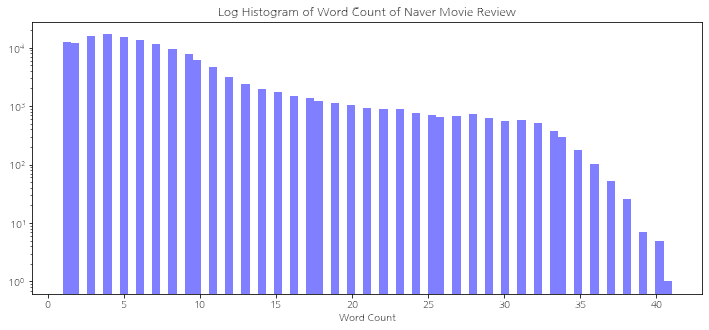

In [ ]:
plt.figure(figsize=(12,5))
plt.hist(train_df['word_cnt'], bins=75, alpha=0.5, color='b', label='train')
plt.yscale('log', nonposy='clip')
plt.title('Log Histogram of Word Count of Naver Movie Review')
plt.xlabel('Word Count')

In [ ]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))


matplotlib: 3.2.2


In [ ]:
%%time
from wordcloud import WordCloud

train_review = [row for row in train_df['document'] if type(row) is str]
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(' '.join(train_review))

CPU times: user 14.4 s, sys: 1.54 s, total: 15.9 s
Wall time: 15.9 s


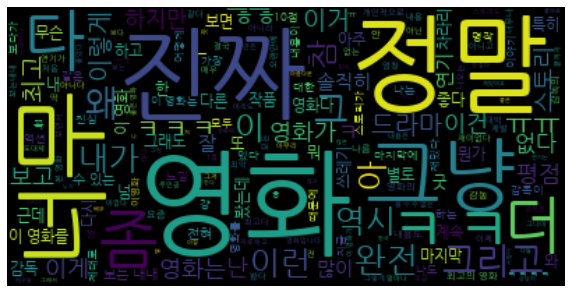

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
%%time
from wordcloud import WordCloud

train_review = [row for row in train_df[train_df['label']==1]['document'] if type(row) is str]
positive_wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(' '.join(train_review))

CPU times: user 7.85 s, sys: 248 ms, total: 8.1 s
Wall time: 8.19 s


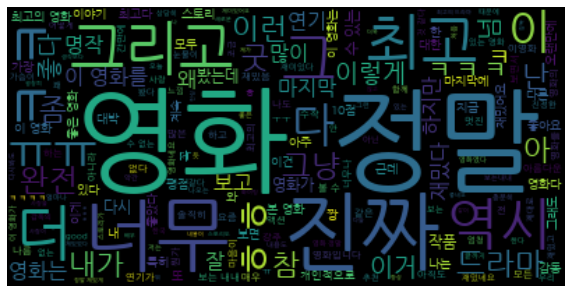

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
%%time
from wordcloud import WordCloud

train_review = [row for row in train_df[train_df['label']==0]['document'] if type(row) is str]
negative_wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(' '.join(train_review))

CPU times: user 7.47 s, sys: 237 ms, total: 7.71 s
Wall time: 7.73 s


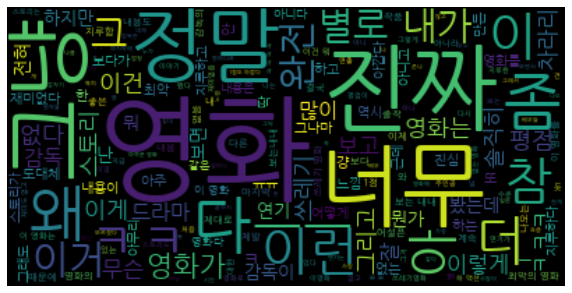

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def print_basic_stats(df, col_name):
    print('===== {} ====='.format(col_name))
    print('Maximum: {}'.format(np.max(df[col_name])))
    print('Minimum: {}'.format(np.min(df[col_name])))
    print('Mean: {:.3f}'.format(np.mean(df[col_name])))    
    print('Stddev: {:.3f}'.format(np.std(df[col_name])))
    print('1st quartile: {}'.format(np.percentile(df[col_name], 25)))
    print('Median: {}'.format(np.median(df[col_name])))      
    print('3rd quartile: {}'.format(np.percentile(df[col_name], 75))) 
    
print_basic_stats(train_df, 'char_cnt')
print_basic_stats(train_df, 'word_cnt')

===== char_cnt =====
Maximum: 146
Minimum: 0
Mean: 35.203
Stddev: 29.532
1st quartile: 16.0
Median: 27.0
3rd quartile: 42.0
===== word_cnt =====
Maximum: 41
Minimum: 1
Mean: 7.585
Stddev: 6.514
1st quartile: 3.0
Median: 6.0
3rd quartile: 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


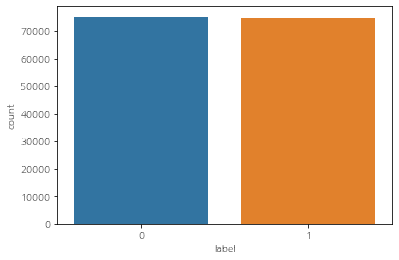

In [ ]:
import seaborn as sns
sns.countplot(train_df['label'])

In [ ]:
pos_cnt, neg_cnt = train_df['label'].value_counts()
# print(pos_cnt)
# print(neg_cnt)

train_df['label'].value_counts()



75173
74827


0    75173
1    74827
Name: label, dtype: int64

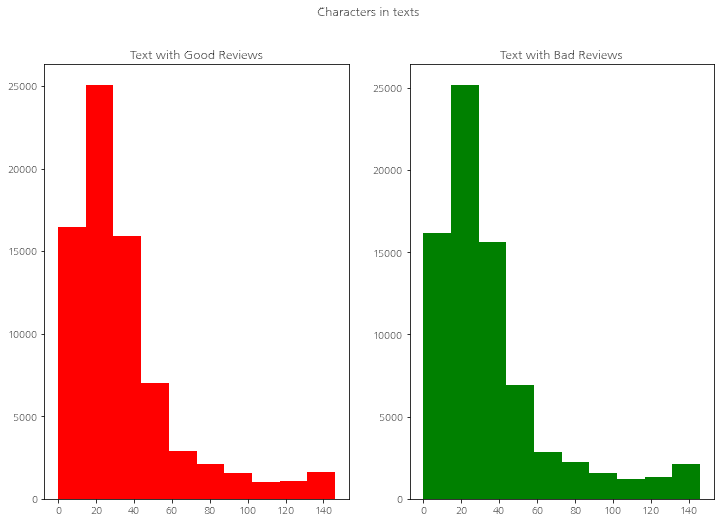

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,8))
text_len = train_df[train_df['label']==1]['char_cnt']
ax1.hist(text_len, color='red')
ax1.set_title('Text with Good Reviews')
text_len2 = train_df[train_df['label']==0]['char_cnt']
ax2.hist(text_len2, color='green')
ax2.set_title('Text with Bad Reviews')
fig.suptitle('Characters in texts')
plt.show()

In [ ]:
%%time
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

corpus = get_corpus(train_df.document)
corpus[:5]

CPU times: user 301 ms, sys: 44.9 ms, total: 346 ms
Wall time: 348 ms


['아', '더빙..', '진짜', '짜증나네요', '목소리']

In [ ]:
# Common words in Text
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'영화': 10825,
 '너무': 8239,
 '정말': 7791,
 '진짜': 5929,
 '이': 5059,
 '영화.': 3598,
 '왜': 3285,
 '더': 3260,
 '이런': 3249,
 '그냥': 3237}

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
most_common_uni = get_top_text_ngrams(train_df.document,20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
# Common Bigrams in Text
most_common_bi = get_top_text_ngrams(train_df.document,20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Bigrams in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
# Common Trigrams in Text

most_common_tri = get_top_text_ngrams(train_df.document,20,3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Trigrams in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

키워드 추출에에 관한한 고민민

댓글글 데이터이다다 보니니 오타, 신조어어, 비속어어 등등 Noisy가가 많은은 문장이이 주를를 이룬다다.

- 데이터만만 보고 BPE 기반반 알고리즘으로로?
- 기존의의 띄어쓰기 

## 2. BertWordPiece Tokenizer를 통한 키워드 추출

In [ ]:
!pip install tokenizers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from tokenizers import BertWordPieceTokenizer
import time

if __name__ == "__main__":
    tokenizer = BertWordPieceTokenizer(lowercase=False, strip_accents=False)

    data_file = './data/ratings_train.txt'
    vocab_size = 20000
    limit_alphabet = 6000
    min_frequency = 5

    print("Training BertWordPiece Tokenizer... this takes about 30 seconds.")
    start = time.time()
    tokenizer.train(files=data_file,
                    vocab_size=vocab_size,
                    limit_alphabet=limit_alphabet,
                    min_frequency=min_frequency)
    print("Train completed. Took {:.2f} seconds.".format(time.time() - start))
    
    tokenizer.save_model('./data')

Training BertWordPiece Tokenizer... this takes about 30 seconds.
Train completed. Took 26.56 seconds.


In [ ]:
vocab = pd.read_csv('./data/vocab.txt', sep = "\n", engine='python', names=['Token'], header=None, quoting=3)

In [ ]:
vocab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Token   20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [ ]:
vocab.head(20)

,Token
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
5,!
6,""""
7,#
8,$
9,%


In [ ]:
vocab_dict = vocab.to_dict()['Token']

# First elem: Negative Count (Number of non-toxic comment)
# Second elem: Positive Count (Number of toxic comment)

vocab2num = {v: [0, 0] for k, v in vocab_dict.items()}

In [ ]:
%%time
# Should be executed only once!
from tqdm import tqdm

for idx, row in tqdm(train_df.iterrows(), total=train_df.shape[0]):
    
    text = row.document
    label = row.label
    output = tokenizer.encode(text)

    for i in range(len(output.tokens)):
        if label == 1:
            vocab2num[output.tokens[i]][1] += 1
        elif label == 0:
            vocab2num[output.tokens[i]][0] += 1
        else:
            assert(0)

100%|██████████| 150000/150000 [00:37<00:00, 4012.04it/s]

CPU times: user 36.8 s, sys: 352 ms, total: 37.1 s
Wall time: 37.4 s


Assume train data is independent. We'll try to find which word is NOT relative to label by using the notion of independence, i.e. P(T|W) = P(T).


In [ ]:
%%time
import math
threshold = pos_cnt / (pos_cnt + neg_cnt)

irrelevants = []
cnt = 0

for word in vocab2num.keys():
    neg_cnt_i, pos_cnt_i = vocab2num[word]
    
    if pos_cnt_i + neg_cnt_i == 0:
        # print(pos_cnt_i, neg_cnt_i)
        cnt += 1
    else:
        prob = pos_cnt_i / (pos_cnt_i + neg_cnt_i)
    
        if abs(prob - threshold) < 0.005:
            irrelevants.append(word)

print(irrelevants)
print(len(irrelevants))
print(cnt)

['>', 'D', '¡', '´', 'π', '↓', '「', '低', '典', '好', '山', '惡', '感', '者', '韓', '강', '겐', '겻', '굉', '권', '귀', '균', '깁', '깟', '께', '낌', '낑', '낙', '넓', '넛', '넢', '넥', '년', '놉', '누', '눅', '담', '닷', '댐', '댑', '덴', '뎃', '돔', '됀', '됏', '딩', '떼', '떽', '뜰', '띌', '럽', '렛', '령', '롭', '롸', '루', '뤽', '맏', '맬', '맵', '멧', '묵', '뭇', '미', '믹', '바', '박', '밣', '벵', '봈', '봭', '뵨', '븨', '빢', '뻬', '뼛', '뽐', '뽱', '뾰', '삐', '살', '샛', '셜', '숟', '싄', '싯', '쌘', '쎔', '씬', '얇', '얍', '얏', '엌', '엣', '여', '옭', '옹', '왓', '웁', '윅', '윈', '읅', '읭', '저', '줍', '쥑', '쥴', '즈', '짯', '쩍', '쪾', '쭌', '찮', '책', '촛', '추', '칠', '캄', '캉', '캥', '캭', '콧', '퀀', '퀘', '탤', '튕', '트', '팍', '팟', '팸', '펌', '펩', '편', '푸', '푼', '프', '핳', '핼', '헸', '홀', '환', '황', '횽', '훙', '흝', '힘', '##밖', '##4', '##독', '##름', '##미', '##게', '##주', '##음', '##되', '##피', '##을', '##R', '##실', '##혜', '##꺅', '##타', '##루', '##룡', '##론', '##릴', '##큼', '##짐', '##포', '##뉜', '##긍', '##순', '##담', '##키', '##랭', '##얼', '##천', '##젼', '##백', '##춰', '##셔', '##힌', '##럤', '##헵', '##

In [ ]:
train_df.shape

(150000, 5)

Even if the meaning of the word itself is not relevant to deciding the positivity of a comment, there might be words that are related to the label probability in some way: for example, if movie "ABCDEFG" has really low rating, the comments including the word "ABCDEFG" will be mostly negative. Let's see if we can detect these cases.